# Imports

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Utils

In [2]:
def detect_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
    for (x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Code

In [3]:
human_faces = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        human_faces.append(os.path.join(dirname, filename))

In [4]:
# Load the pre-built Haar cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

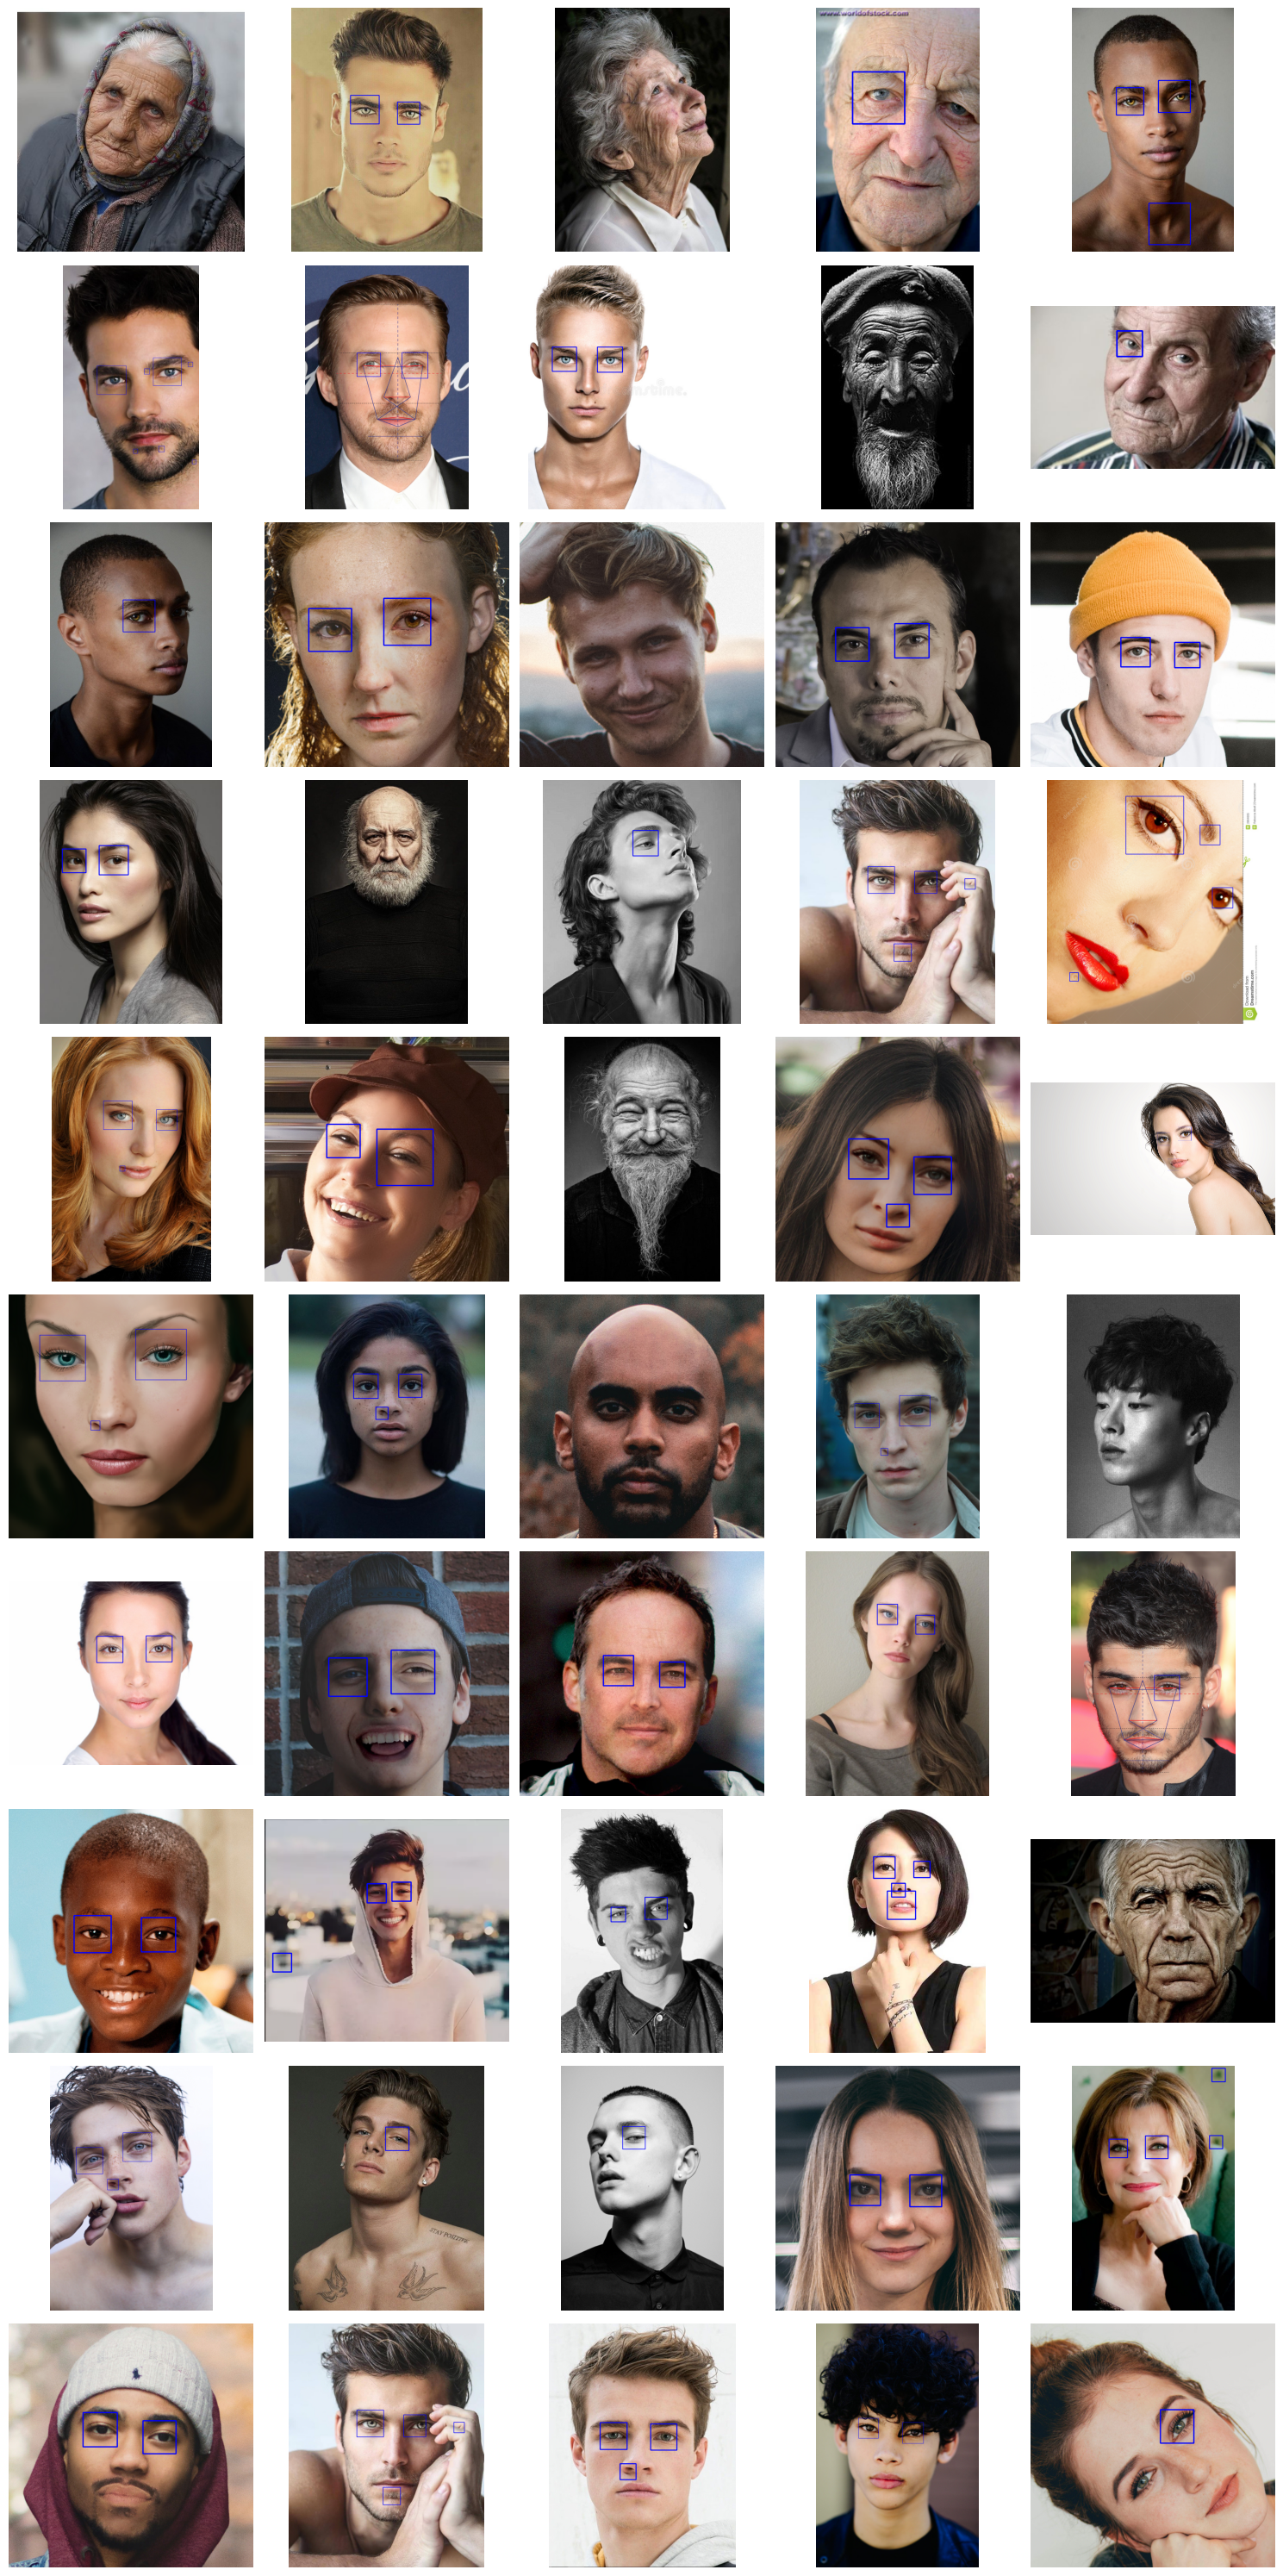

In [5]:
# Slice first 50 images for testing
human_faces = human_faces[:50]

# Number of columns in the grid
cols = 5

# Calculate the number of rows needed
rows = (len(human_faces) + cols - 1) // cols

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

# Loop through the images and plot each one
for i, image_path in enumerate(human_faces):
    img_with_eyes = detect_eyes(image_path)
    ax = axes[i // cols, i % cols]
    ax.imshow(img_with_eyes)
    ax.axis('off')  # Hide axes

# Hide any empty subplots
for j in range(i + 1, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()